In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("financial_market.csv")

In [3]:
df.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),Category
0,AAL,American Airlines Group Inc.,10.68,-0.05,-0.47%,32.909M,33.643M,7.007B,15.04,Most_active
1,AAPL,Apple Inc.,230.54,2.97,1.31%,52.696M,68.528M,3.535T,35.85,Most_active
2,ABEV,Ambev S.A.,2.15,0.01,0.47%,15.183M,17.544M,33.811B,12.65,Most_active
3,ABM,ABM Industries Incorporated,51.28,0.73,1.44%,"3,70,760","6,28,083",3.219B,13.39,Undervalued_growth_stocks
4,ABR,"Arbor Realty Trust, Inc.",12.89,-2.64,-17.00%,38.125M,4.164M,2.43B,8.06,"Top_Losers, Most_active"


In [4]:
df.shape

(300, 10)

# Column Type
### Numerical -  Price, Change, % Change, Volume, Avg Vol (3 month), Market Cap, PE Ratio (TTM)
### Catgorical -  Symbol, Name, Category

 renaming the column "volume" as "volume in millions" and remove the 'm' from the values

In [5]:
df.rename(columns = {"Volume":"Volume in Millions"}, inplace=True)
df["Volume in Millions"] = df["Volume in Millions"].str.replace('M','').str.replace(',','').astype(float)

In [6]:
df.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume in Millions,Avg Vol (3 month),Market Cap,PE Ratio (TTM),Category
0,AAL,American Airlines Group Inc.,10.68,-0.05,-0.47%,32.909,33.643M,7.007B,15.04,Most_active
1,AAPL,Apple Inc.,230.54,2.97,1.31%,52.696,68.528M,3.535T,35.85,Most_active
2,ABEV,Ambev S.A.,2.15,0.01,0.47%,15.183,17.544M,33.811B,12.65,Most_active
3,ABM,ABM Industries Incorporated,51.28,0.73,1.44%,370760.000,"6,28,083",3.219B,13.39,Undervalued_growth_stocks
4,ABR,"Arbor Realty Trust, Inc.",12.89,-2.64,-17.00%,38.125,4.164M,2.43B,8.06,"Top_Losers, Most_active"


In [7]:
df['% Change'] = df['% Change'].str.replace('%','')
df['Avg Vol (3 month)'] = df['Avg Vol (3 month)'].str.replace('M','')

In [8]:
def convert_market_cap_to_millions(value):
    if 'B' in value:
        return float(value.replace('B', '')) * 1e3  # 1 billion = 1,000 million
    elif 'T' in value:
        return float(value.replace('T', '')) * 1e6  # 1 trillion = 1,000,000 million
    elif 'M' in value:
        return float(value.replace('M', ''))  # 1 million = 1 million
    else:
        return float(value)

df['Market Cap'] = df['Market Cap'].apply(convert_market_cap_to_millions)

In [9]:
df.rename(columns = {"Market Cap":"Market Cap in Millions"}, inplace=True)

In [10]:
df.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume in Millions,Avg Vol (3 month),Market Cap in Millions,PE Ratio (TTM),Category
0,AAL,American Airlines Group Inc.,10.68,-0.05,-0.47,32.909,33.643,7007.0,15.04,Most_active
1,AAPL,Apple Inc.,230.54,2.97,1.31,52.696,68.528,3535000.0,35.85,Most_active
2,ABEV,Ambev S.A.,2.15,0.01,0.47,15.183,17.544,33811.0,12.65,Most_active
3,ABM,ABM Industries Incorporated,51.28,0.73,1.44,370760.000,"6,28,083",3219.0,13.39,Undervalued_growth_stocks
4,ABR,"Arbor Realty Trust, Inc.",12.89,-2.64,-17.00,38.125,4.164,2430.0,8.06,"Top_Losers, Most_active"


# Price

## 1. Price has positively skewed distribution
## 2.  There are no missing values
## 3.  There are some outliers

In [11]:
df['Price (Intraday)'].describe()

count    300.000000
mean      59.639300
std       83.481321
min        1.010000
25%       11.907500
50%       28.395000
75%       67.785000
max      498.870000
Name: Price (Intraday), dtype: float64

<AxesSubplot:ylabel='Frequency'>

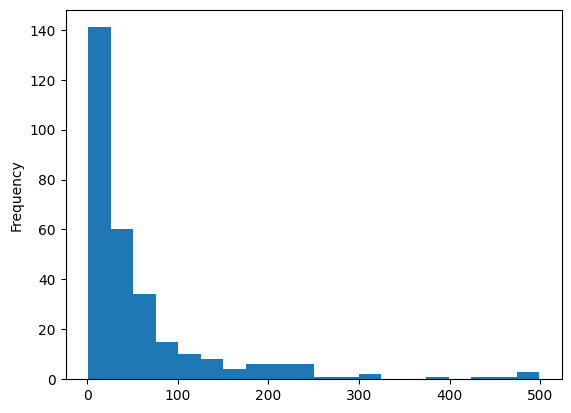

In [12]:
df['Price (Intraday)'].plot(kind="hist",bins=20)

<AxesSubplot:ylabel='Density'>

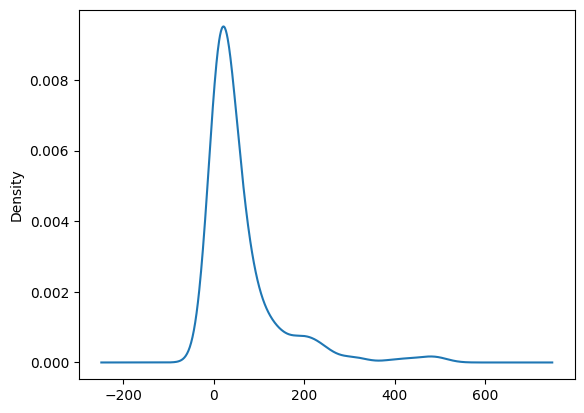

In [13]:
df['Price (Intraday)'].plot(kind="kde")

In [14]:
df['Price (Intraday)'].skew()

2.8836631574490488

<AxesSubplot:>

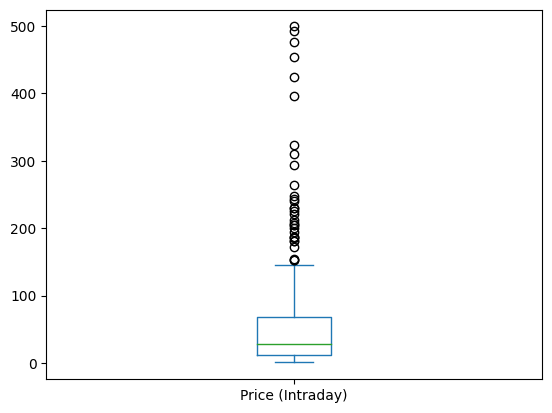

In [15]:
df['Price (Intraday)'].plot(kind='box')

In [16]:
count = (df['Price (Intraday)'] > 150).sum()
count

32

In [17]:
df['Price (Intraday)'].isnull().sum()

0

# Change

## 1. Change has positively skewed distribution
## 2.  There are no missing values
## 3.  There are some outliers

In [18]:
df['Change'].describe()

count    300.000000
mean       0.881414
std        3.194807
min      -13.830000
25%       -0.020000
50%        0.295000
75%        1.275000
max       22.750000
Name: Change, dtype: float64

<AxesSubplot:ylabel='Frequency'>

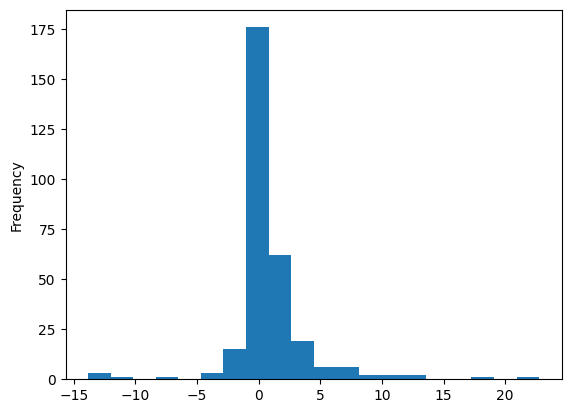

In [19]:
df['Change'].plot(kind='hist',bins=20)

<AxesSubplot:ylabel='Density'>

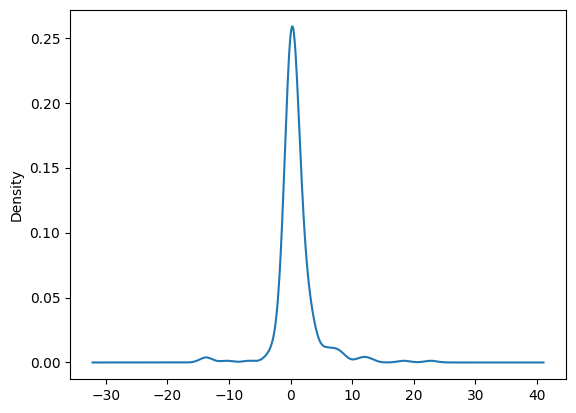

In [20]:
df['Change'].plot(kind='kde')

<AxesSubplot:>

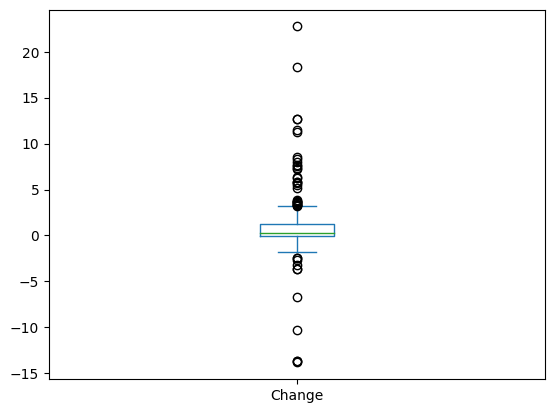

In [21]:
df['Change'].plot(kind='box')

In [22]:
df['Change'].skew()

1.3522336144739782

In [23]:
count_change = (df['Change'] > 4).sum()
count_change

20

In [24]:
count_change_low = (df['Change'] < -3).sum()
count_change_low

8

In [25]:
df['Change'].isnull().sum()

0

# % Change

## 1. % Change has positively skewed distribution
## 2.  There are no missing values
## 3.  There are some outliers

In [26]:
df['% Change'] = df['% Change'].astype(float)

In [27]:
df['% Change'].describe()

count    300.000000
mean       1.857433
std        4.026752
min      -17.000000
25%       -0.182500
50%        1.325000
75%        3.902500
max       25.860000
Name: % Change, dtype: float64

<AxesSubplot:ylabel='Frequency'>

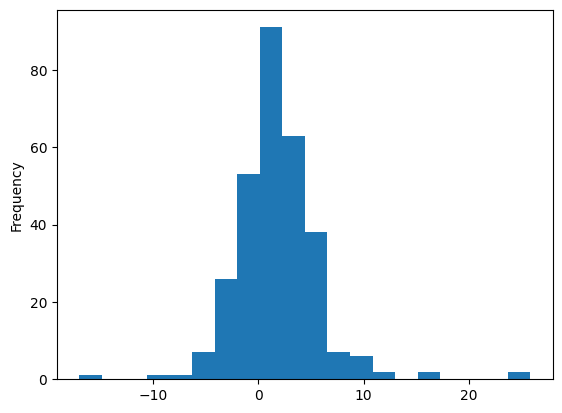

In [28]:
df['% Change'].plot(kind='hist',bins=20)

<AxesSubplot:ylabel='Density'>

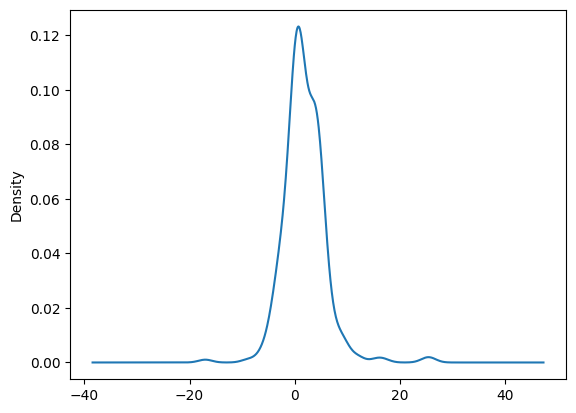

In [29]:
df['% Change'].plot(kind='kde')

<AxesSubplot:>

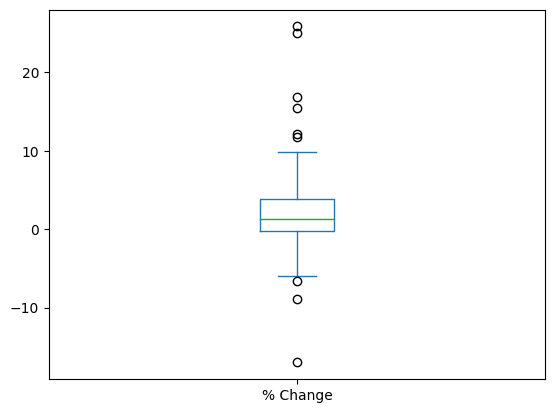

In [30]:
df['% Change'].plot(kind='box')

In [31]:
df['% Change'].skew()

1.2904203889035746

In [32]:
count_percentage_change = (df['% Change'] > 11).sum()
count_percentage_change

6

In [33]:
count_percentage_change_low = (df['% Change'] < 0).sum()
count_percentage_change_low

79

In [34]:
df['% Change'].isnull().sum()

0

# Volume 

## 1 It has positivily skewed distribution
## 2 There are no missing values
## 3 there are some outliers

In [35]:
df['Volume in Millions'].describe()

count       300.000000
mean     162459.409217
std      264785.132559
min           1.007000
25%           5.764750
50%          19.445500
75%      301196.000000
max      952597.000000
Name: Volume in Millions, dtype: float64

<AxesSubplot:ylabel='Frequency'>

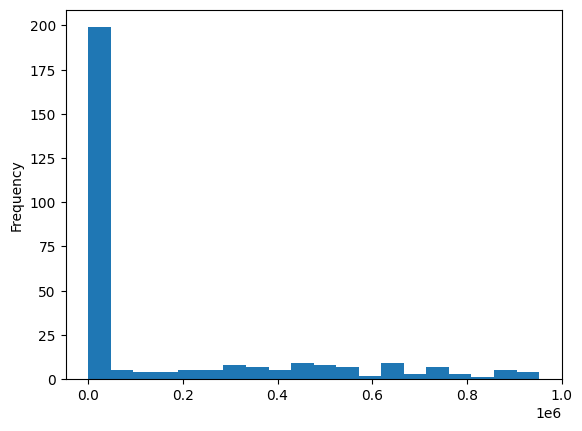

In [36]:
df['Volume in Millions'].plot(kind = 'hist',bins=20)

<AxesSubplot:ylabel='Density'>

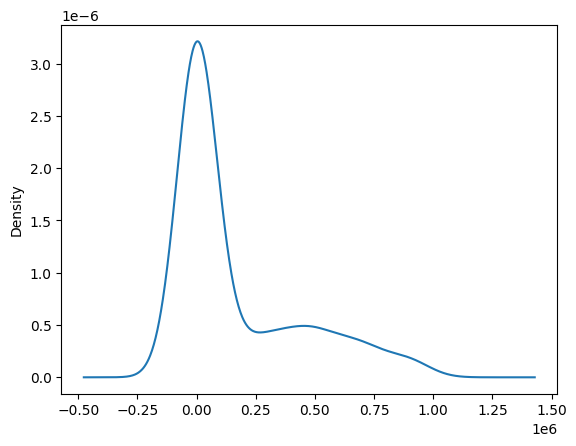

In [37]:
df['Volume in Millions'].plot(kind = 'kde')

<AxesSubplot:>

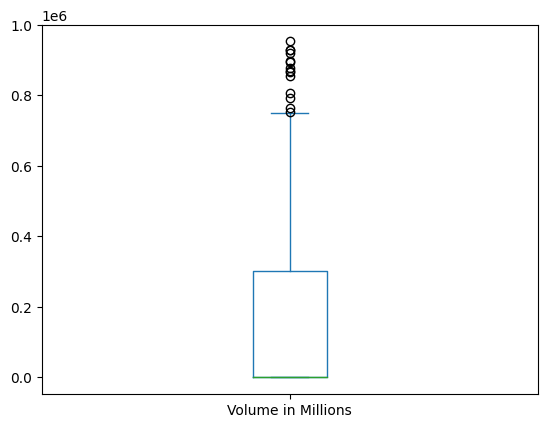

In [38]:
df['Volume in Millions'].plot(kind='box')

In [39]:
df['Volume in Millions'].skew()

1.4380971396232975

In [40]:
count_volume = (df['Volume in Millions'] > 0.7*1e6).sum()
count_volume

21

In [41]:
df['Volume in Millions'].isnull().sum()

0

# Avg Vol (3 month)

## 1 It has positivily skewed distribution
## 2 There are no missing values
## 3 there are some outliers

In [42]:
df['Avg Vol (3 month)'] = df['Avg Vol (3 month)'].str.replace(',', '').astype(float)

In [43]:
df['Avg Vol (3 month)'].describe()

count       300.000000
mean     172877.432737
std      286734.963760
min           1.041000
25%           3.851000
50%          17.210500
75%      279726.000000
max      999712.000000
Name: Avg Vol (3 month), dtype: float64

<AxesSubplot:ylabel='Frequency'>

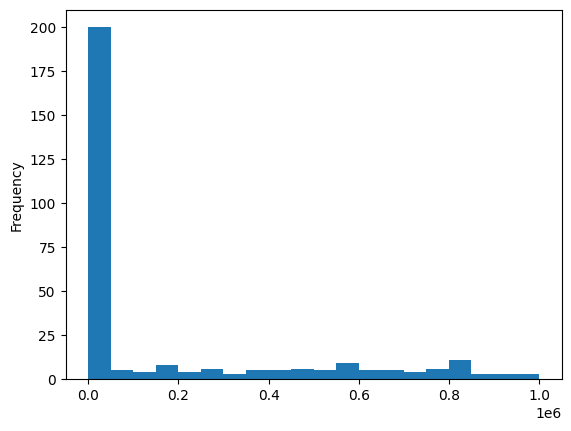

In [44]:
df['Avg Vol (3 month)'].plot(kind = 'hist',bins=20)

<AxesSubplot:ylabel='Density'>

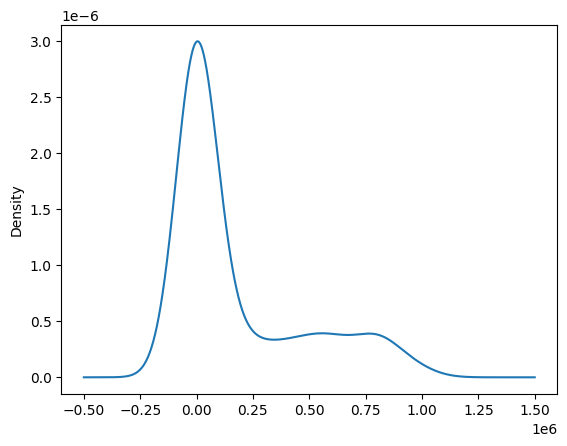

In [45]:
df['Avg Vol (3 month)'].plot(kind = 'kde')

<AxesSubplot:>

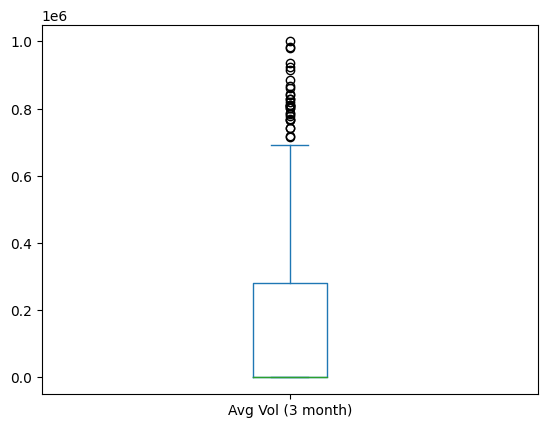

In [46]:
df['Avg Vol (3 month)'].plot(kind='box')

In [47]:
df['Avg Vol (3 month)'].skew()

1.4283229336154282

In [48]:
count_AVG_volume = (df['Avg Vol (3 month)'] > 0.7*1e6).sum()
count_AVG_volume

30

In [49]:
df['Avg Vol (3 month)'].isnull().sum()

0

# Market Cap in Millions
## 1 It has positivily skewed distribution
## 2 There are no missing values
## 3 there are some outliers

In [50]:
df['Market Cap in Millions'].describe()

count    3.000000e+02
mean     9.553024e+04
std      4.133817e+05
min      1.731770e+02
25%      3.048000e+03
50%      8.123500e+03
75%      2.504725e+04
max      3.535000e+06
Name: Market Cap in Millions, dtype: float64

<AxesSubplot:ylabel='Frequency'>

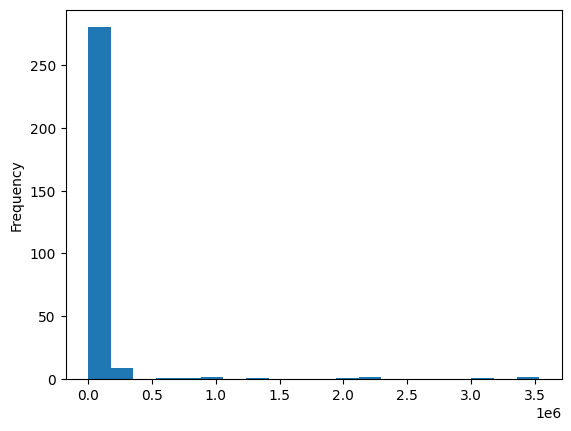

In [51]:
df['Market Cap in Millions'].plot(kind = 'hist',bins=20)

<AxesSubplot:ylabel='Density'>

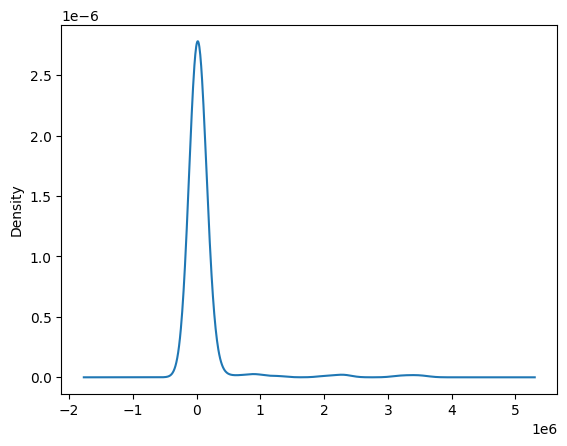

In [52]:
df['Market Cap in Millions'].plot(kind = 'kde')

<AxesSubplot:>

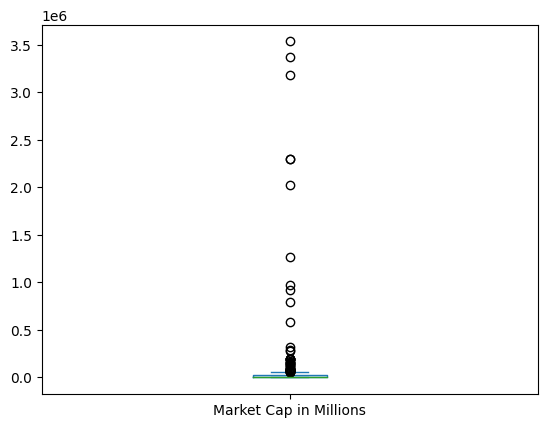

In [53]:
df['Market Cap in Millions'].plot(kind='box')

In [54]:
df['Market Cap in Millions'].skew()

6.520738684915577

In [55]:
count_AVG_volume = (df['Market Cap in Millions'] > 0.4*1e6).sum()
count_AVG_volume

11

In [56]:
df['Market Cap in Millions'].isnull().sum()

0

# PE Ratio (TTM)
## 1 It has positivily skewed distribution
## 2 There are 24% missing values
## 3 there are some outliers

In [57]:
df['PE Ratio (TTM)'] = df['PE Ratio (TTM)'].str.replace(',','').astype(float)

In [58]:
df['PE Ratio (TTM)'].describe()

count     226.000000
mean       41.959646
std       185.369448
min         1.210000
25%        10.405000
50%        15.425000
75%        27.442500
max      2687.000000
Name: PE Ratio (TTM), dtype: float64

<AxesSubplot:ylabel='Frequency'>

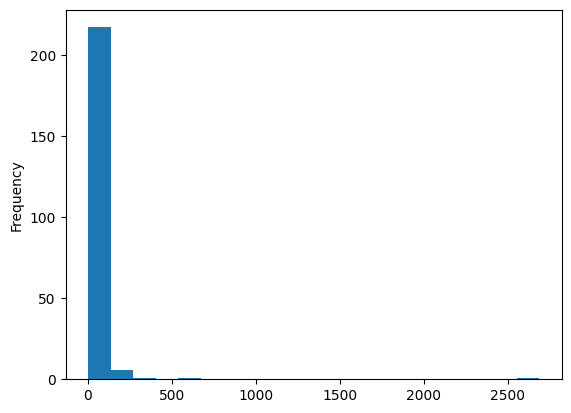

In [59]:
df['PE Ratio (TTM)'].plot(kind = 'hist',bins=20)

<AxesSubplot:ylabel='Density'>

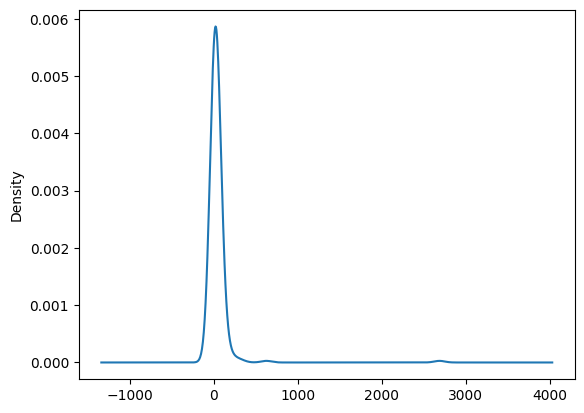

In [60]:
df['PE Ratio (TTM)'].plot(kind = 'kde')

<AxesSubplot:>

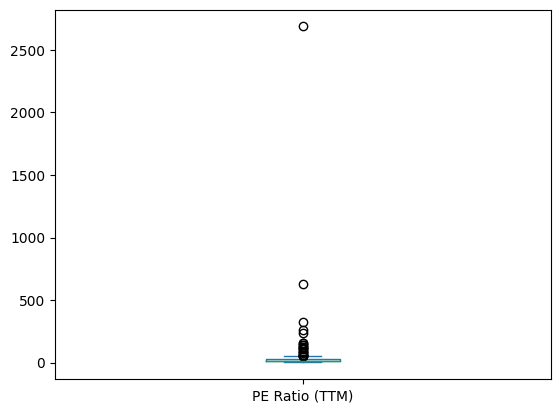

In [61]:
df['PE Ratio (TTM)'].plot(kind='box')

In [62]:
df['PE Ratio (TTM)'].skew()

13.197660676342638

In [63]:
count_AVG_volume = (df['PE Ratio (TTM)'] > 300).sum()
count_AVG_volume

3

In [64]:
df['PE Ratio (TTM)'].isnull().sum()/len(df['PE Ratio (TTM)'])

0.24666666666666667

In [65]:
df.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume in Millions,Avg Vol (3 month),Market Cap in Millions,PE Ratio (TTM),Category
0,AAL,American Airlines Group Inc.,10.68,-0.05,-0.47,32.909,33.643,7007.0,15.04,Most_active
1,AAPL,Apple Inc.,230.54,2.97,1.31,52.696,68.528,3535000.0,35.85,Most_active
2,ABEV,Ambev S.A.,2.15,0.01,0.47,15.183,17.544,33811.0,12.65,Most_active
3,ABM,ABM Industries Incorporated,51.28,0.73,1.44,370760.000,628083.000,3219.0,13.39,Undervalued_growth_stocks
4,ABR,"Arbor Realty Trust, Inc.",12.89,-2.64,-17.00,38.125,4.164,2430.0,8.06,"Top_Losers, Most_active"


# Category


In [66]:
df['Category'].value_counts()

Undervalued_growth_stocks                              95
Top_Gainers                                            83
Most_active                                            74
Top_Losers                                             21
Top_Gainers, Most_active                               15
Top_Losers, Most_active                                 7
Top_Gainers, Most_active, Undervalued_growth_stocks     2
Top_Losers, Most_active, Undervalued_growth_stocks      1
Most_active, Undervalued_growth_stocks                  1
Top_Losers, Undervalued_growth_stocks                   1
Name: Category, dtype: int64

<AxesSubplot:>

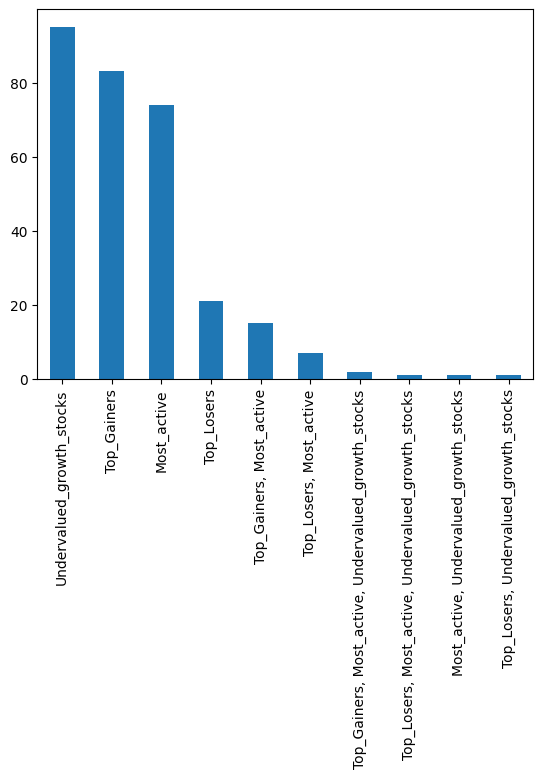

In [67]:
df['Category'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Category'>

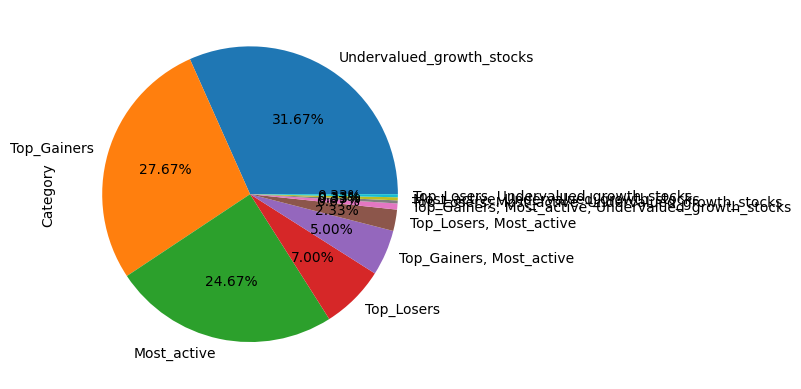

In [68]:
df['Category'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [69]:
df['Category'].isnull().sum()

0

In [70]:
df['Name'].isnull().sum()

0